In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import requests

In [2]:
## problema 1 Calculo de coeficientes 
url="https://janaf.nist.gov/tables/C-067.txt"
file=requests.get(url)
datos=file.text
datos=datos.split("\n")[3:-1]
mat=[]
for X in datos:
    s=X.split("\t")
    mat.append([float(a) for a in s])
mat=np.array(mat)
mat

array([[ 1.00000e+02,  3.32580e+01,  1.49500e+02,  2.16485e+02,
        -6.69800e+00, -6.96440e+01, -6.43530e+01,  3.36150e+01],
       [ 2.00000e+02,  3.34730e+01,  1.72577e+02,  1.89418e+02,
        -3.36800e+00, -7.20270e+01, -5.81610e+01,  1.51900e+01],
       [ 2.50000e+02,  3.42160e+01,  1.80113e+02,  1.86829e+02,
        -1.67900e+00, -7.34260e+01, -5.45360e+01,  1.13950e+01],
       [ 2.98150e+02,  3.56390e+01,  1.86251e+02,  1.86251e+02,
         0.00000e+00, -7.48730e+01, -5.07680e+01,  8.89400e+00],
       [ 3.00000e+02,  3.57080e+01,  1.86472e+02,  1.86252e+02,
         6.60000e-02, -7.49290e+01, -5.06180e+01,  8.81300e+00],
       [ 3.50000e+02,  3.78740e+01,  1.92131e+02,  1.86694e+02,
         1.90300e+00, -7.64610e+01, -4.64450e+01,  6.93200e+00],
       [ 4.00000e+02,  4.05000e+01,  1.97356e+02,  1.87704e+02,
         3.86100e+00, -7.79690e+01, -4.20540e+01,  5.49200e+00],
       [ 4.50000e+02,  4.33740e+01,  2.02291e+02,  1.89053e+02,
         5.95700e+00, -7.94220e+0

In [3]:
A=8.997
B=93.7967
C=-53.12099
D=12.1159
E=0.36272

T=np.arange(298,1200,0.1)
dT=0.1
t=T/1000
Cp=A+B*t+C*t**2+D*t**3+E/t**2 #j/K-mol
Cp
#cuanto calor se necesita para ir de 0 a 1200
H=np.sum(Cp*dT)
H
#en forma acumulativa#
H=np.cumsum(Cp*dT)+55.13*1000
H[-1] #cuando H vale 0
S=np.cumsum(Cp/T*dT)
G=H-T*S

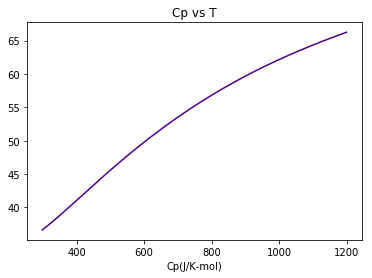

In [4]:
plt.plot(T,Cp,color="indigo")
plt.title("Cp vs T")
plt.xlabel("Cp(J/K-mol)")
plt.show()

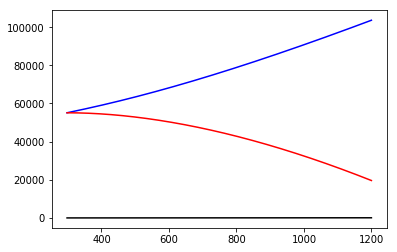

In [5]:
plt.plot(T,H,color="blue")
plt.plot(T,S,color="black")
plt.plot(T,G,color="red")
plt.title("")
plt.show()

In [6]:
Cp

array([36.63619114, 36.63998726, 36.64378529, ..., 66.24150952,
       66.24333269, 66.24515568])

In [7]:
###problema 2

In [10]:
deltaS_NO=236.761
deltaH_NO=90.381*1000    
deltaS_NO2=275.988
deltaH_NO2=31.878*1000
deltaS_O2=231.466
deltaH_O2=0*1000

T=700   
pt=200   
R=8.314  

In [11]:
uNO_est=deltaH_NO-T*deltaS_NO
uNO2_est=deltaH_NO2-T*deltaS_NO2
uO2_est=deltaH_O2-T*deltaS_O2
print(uNO_est,uNO2_est,uO2_est

SyntaxError: unexpected EOF while parsing (<ipython-input-11-094ab796dc29>, line 4)

In [ ]:
x=np.arange(0.001,1,0.001)
n_NO=1-x       ##x es shi 
n_NO2=x
n_O2=(1/2)-(1/2)*x
nt=(3/2)-(1/2)*x

X_NO=n_NO/nt
X_NO2=n_NO2/nt
X_O2=n_O2/nt

In [ ]:
uNO=uNO_est+R*T*np.log(X_NO)
uNO2=uNO2_est+R*T*np.log(X_NO2)
uO2=uO2_est+R*T*np.log(X_O2)
uT=n_NO*uNO+n_NO2*uNO2+n_O2*uO2

In [ ]:
minimo=np.min(uT)
n=np.where(minimo==uT)
xeq=x[n]
print(xeq)


plt.plot(x,uT,color="red")
plt.axvline(x=xeq,color="green",linestyle="-.")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\Delta G$ (J/mol)")

plt.show()

In [ ]:
pNO2=((xeq)/((3/2)-(1/2)*xeq))*pt
pNO=(1-xeq/((3/2)-(1/2)*xeq))*pt
pO2=(((1/2)-(1/2)*xeq)/((3/2)-(1/2)*xeq))*pt

Kp=((pNO2)/(pNO*pO2**(1/2)))
print(Kp


In [ ]:
## Problema 3

In [ ]:
def secuenciaADN(i):
    a = np.arange(4)
    cad=(np.random.choice(a, i, replace=True))
    sec=str(cad)
    sec1=sec.replace('0','A')
    sec2=sec1.replace('1','T')
    sec3=sec2.replace('2','C')
    sec4=sec3.replace('3','G')
    return(sec4)

In [ ]:
x=secuenciaADN(1000)
y=x[1]

y=np.random.randn(1000)
plt.hist(y,bins=4, facecolor='blue', edgecolor='yellow',density=False)
plt.title('Secuencia de ADN')
plt.xlabel('bases nitrogenadas')
plt.ylabel('Frecuencia')
plt.text(2,100,'A')
plt.text(-2,100,'C')
plt.text(-1,400,'T')
plt.text(1,200,'G')
plt.show()
print(x)